# Describir un dataset

In [6]:
import pandas as pd
from pandasql import sqldf

In [23]:
FILE = "./noticias_losrios_2022_porcomuna_sentimientos.csv"
DATASET = pd.read_csv(FILE)
DATASET.drop('Unnamed: 0', axis=1, inplace=True)
DATASET = DATASET.dropna(subset=['text'])

DATASET

,id_news,country,media_outlet,url,title,text,date,search,Lago_Ranco,Los_Lagos,...,La_Unión,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia,prediction,score
0,47314428.0,chile,suractual,https://www.suractual.cl/2022/01/24/ante-proye...,Ante proyecto Tierras Raras municipio y Unión ...,“Considerando la evolución que ha tenido el Pr...,2022-01-24,NaN,0,0,...,0,0,0,0,0,0,0,0,NEU,0.988633
1,47719086.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2022/01/25/trac...,Tractocamión volcó esta mañana en puente Lloll...,El accidente se produjo pasadas las 06:00 AM y...,2022-01-25,NaN,0,0,...,1,0,0,0,0,0,0,0,NEU,0.998064
2,47719110.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2022/01/27/gobe...,Gobernadores Regionales de Los Ríos y Los Lago...,La instancia buscó generar un trabajo colabora...,2022-01-27,NaN,0,1,...,0,0,0,0,0,0,0,0,NEU,0.931461
3,47700339.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Alegan inocencia de acusadas por cruel asesina...,La defensa de las dos mujeres acusadas de enca...,2022-01-05,NaN,0,0,...,0,0,0,0,0,0,0,1,NEU,0.973683
4,47700425.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Destacan ejecución del Programa Vínculos en Lo...,Para dar protección y acompañamiento a adultos...,2022-01-03,NaN,0,0,...,0,0,0,0,0,0,0,1,POS,0.536478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15142,50428917.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/educacion...,Admisión 2023: Caravana Técnico Profesional de...,Desde este lunes 12 y hasta el miércoles 14 de...,2022-12-13,NaN,0,1,...,0,0,0,0,0,0,0,0,NEU,0.979722
15143,50428943.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/emergenci...,Triple colisión en Los Lagos deja al menos un ...,Tres vehículos se vieron involucrados en un ac...,2022-12-07,NaN,0,1,...,0,0,0,0,0,0,0,0,NEG,0.716544
15144,50428975.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/opinion/2...,Columna de opinión: No quedó ni el sombrero - ...,“Somos en realidad sacos llenos de cosas inédi...,2022-12-09,NaN,0,0,...,0,0,0,0,0,0,0,0,NEG,0.977032
15145,50429002.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/emergenci...,Triste despertar en Los Lagos: comunidad lamen...,Un triste despertar ha tenido este domingo la ...,2022-12-04,NaN,0,1,...,0,0,0,0,0,0,0,0,NEG,0.997505


- Cantidad de noticias por comuna

In [24]:
pysqldf = lambda q: sqldf(q, globals())

query = """
SELECT sum("La_Unión") as "La Unión",
sum("Los_Lagos")as "Los Lagos",
sum(Máfil)as Máfil,
sum(Paillaco) as Paillaco,
sum(Lanco) as Lanco,
sum(Panguipulli) as Panguipulli,
sum("Río_Bueno") as "Río Bueno",
sum(Mariquina) as Mariquina,
sum(Corral) as Corral,
sum(Valdivia) as Valdivia,
sum("Lago_Ranco") as "Lago Ranco",
sum(Futrono) as Futrono 
FROM DATASET
"""

print("Cantidad de noticias total en 2022 por comuna")
query1=pysqldf(query)
query1

Cantidad de noticias total en 2022 por comuna


,La Unión,Los Lagos,Máfil,Paillaco,Lanco,Panguipulli,Río Bueno,Mariquina,Corral,Valdivia,Lago Ranco,Futrono
0,1967,1729,498,2026,778,1271,1352,701,732,8415,838,1605


- Cantidad de noticias sin comuna

In [25]:
# Consulta SQL para contar las filas con solo valores 0
query = '''
        SELECT COUNT(*) as count_zeros
        FROM DATASET
        WHERE La_Unión = 0 AND Los_Lagos = 0 AND Máfil = 0 AND Paillaco = 0 AND Lanco = 0 AND Panguipulli = 0 AND Río_Bueno = 0 AND Mariquina = 0 AND Corral = 0 AND Valdivia = 0 AND Lago_Ranco = 0 AND Futrono = 0
        '''


# Ejecuta la consulta utilizando pandasql
result = pysqldf(query)

# Imprime el resultado
print(result['count_zeros'].values[0])


1542


- Cuáles son las noticias sin comuna

In [26]:
# Consulta SQL para seleccionar las filas con suma igual a 0
query = '''
        SELECT *
        FROM DATASET
        WHERE La_Unión + Los_Lagos + Máfil + Paillaco + Lanco + Panguipulli + Río_Bueno + Mariquina + Corral + Valdivia + Lago_Ranco + Futrono = 0
        '''

# Ejecuta la consulta utilizando pandasql
result = pysqldf(query)

# Imprime el resultado
result

,id_news,country,media_outlet,url,title,text,date,search,Lago_Ranco,Los_Lagos,...,La_Unión,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia,prediction,score
0,47314428.0,chile,suractual,https://www.suractual.cl/2022/01/24/ante-proye...,Ante proyecto Tierras Raras municipio y Unión ...,“Considerando la evolución que ha tenido el Pr...,2022-01-24,None,0,0,...,0,0,0,0,0,0,0,0,NEU,0.988633
1,47700435.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Los Ríos: fin de semana de año nuevo dejó 23 a...,"En la Delegación Presidencial de Los Ríos, se ...",2022-01-03,None,0,0,...,0,0,0,0,0,0,0,0,NEU,0.962602
2,47686946.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2022/01/17/onem...,ONEMI declara Alerta Temprana Preventiva en la...,Se esperan tormentas eléctricas para la tarde ...,2022-01-17,None,0,0,...,0,0,0,0,0,0,0,0,NEU,0.650354
3,47688294.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,"Abren inscripciones para competencia de ""Pajar...",En el marco de la conmemoración a nivel mundia...,2022-01-25,None,0,0,...,0,0,0,0,0,0,0,0,NEU,0.996575
4,47688309.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Anuncian rebaja en el precio de los pasaportes...,"El ministro de Justicia y Derechos Humanos, He...",2022-01-29,None,0,0,...,0,0,0,0,0,0,0,0,NEU,0.982483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,49554721.0,chile,suractual,https://www.suractual.cl/2022/12/12/alianza-en...,"Alianza entre Gobierno Regional, UdeC y UCSC b...",La colaboración busca formar un ecosistema rob...,2022-12-12,None,0,0,...,0,0,0,0,0,0,0,0,NEU,0.687194
1538,49583363.0,chile,suractual,https://www.suractual.cl/2022/12/21/con-mil-mi...,Con mil millones de inversión en 2023 inicia r...,La comunidad junto a la Seremi de Vivienda y l...,2022-12-21,None,0,0,...,0,0,0,0,0,0,0,0,POS,0.955651
1539,50428805.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/politica/...,Iván Flores respalda propuesta aprobada por el...,La sala del Senado aprobó un proyecto de acuer...,2022-12-27,None,0,0,...,0,0,0,0,0,0,0,0,NEU,0.995468
1540,50428844.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/politica/...,Senadores Flores y Sepúlveda piden a Contralor...,Los senadores Iván Flores y Alejandra Sepúlve...,2022-12-16,None,0,0,...,0,0,0,0,0,0,0,0,NEU,0.778844


In [27]:
result["text"][3]

'En el marco de la conmemoración a nivel mundial del Día Internacional de los Humedales, una de las actividades que el CEHUM realizará para la semana de los Humedales en Los Ríos es la sexta versión del “Pajareo Extremo”. Este concurso que se realiza en equipos, consiste en registrar la mayor cantidad de especies que sean avistadas en 24 horas. Inspirado en el formato internacional del “Big Day Count”, este concurso tiene como finalidad resaltar la biodiversidad de aves presentes en la región de Los Ríos y las rutas de avistamiento de aves que es posible desarrollar. Jorge Tomasevic, coordinador científico del CEHUM y organizador de la actividad, explicó que esta competencia busca generar una nueva instancia para que las personas puedan conectarse de una manera diferente con la naturaleza y la biodiversidad existente en nuestra región. Además, señaló que “pueden participar equipos de mínimo 2 y máximo 4 personas, quienes en un plazo máximo de 24 horas pueden recorrer distintos lugares 

- Tamaño promedio de las noticias (en numero de caracteres)

In [28]:
# Consulta SQL para obtener el tamaño promedio de los textos
query = '''
        SELECT AVG(LENGTH(text)) as average_length
        FROM DATASET
        '''

# Ejecuta la consulta utilizando pandasql
result = pysqldf(query)

# Imprime el resultado
print(result['average_length'].values[0])

1746.3436385255648


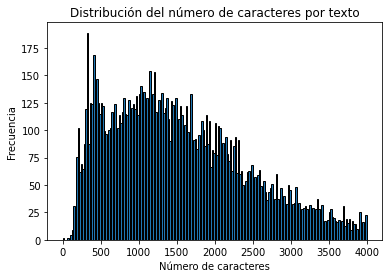

In [38]:
import matplotlib.pyplot as plt

# Calcula la longitud de cada texto
DATASET['num_caracteres'] = DATASET['text'].str.len()

# Crea un histograma para mostrar la distribución del número de caracteres
plt.hist(DATASET['num_caracteres'], bins=200, range=(0, 4000), edgecolor='black')

# Configura las etiquetas y el título del gráfico
plt.xlabel('Número de caracteres')
plt.ylabel('Frecuencia')
plt.title('Distribución del número de caracteres por texto')

# Muestra el gráfico
plt.show()

